In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate demo data
def generate_demo_data(n_samples=10, random_state=42):
    np.random.seed(random_state)
    
    # Generate correlated data
    x1 = np.random.normal(0, 1, n_samples)  # Feature 1
    x2 = 0.8 * x1 + np.random.normal(0, 0.2, n_samples)  # Feature 2 (correlated with x1)
    
    # Combine into a dataset
    data = np.column_stack((x1, x2))
    return data

# Generate data
data = generate_demo_data()
data

array([[ 0.49671415,  0.30468778],
       [-0.1382643 , -0.20375739],
       [ 0.64768854,  0.56654328],
       [ 1.52302986,  0.83576784],
       [-0.23415337, -0.53230627],
       [-0.23413696, -0.29976707],
       [ 1.57921282,  1.06080403],
       [ 0.76743473,  0.67679725],
       [-0.46947439, -0.55718432],
       [ 0.54256004,  0.15158729]])

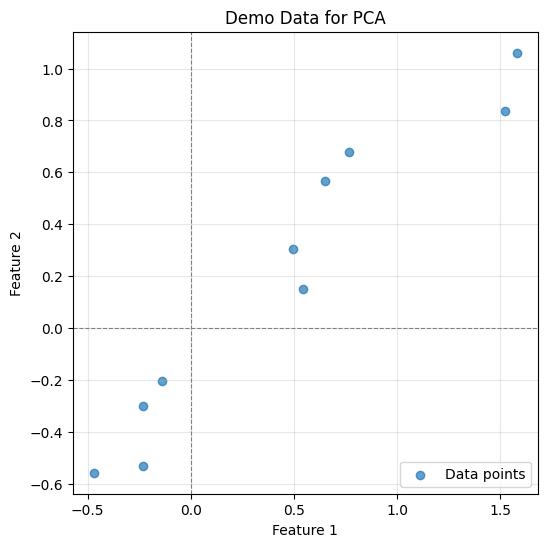

In [2]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label="Data points")
plt.title("Demo Data for PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
# Step 1: Standardize the data (mean-center it)
data_mean = np.mean(data, axis=0)
centered_data = data - data_mean

In [3]:
cov_matrix = np.cov(centered_data, rowvar=False)
cov_matrix

array([[0.52274105, 0.4061227 ],
       [0.4061227 , 0.33806266]])

In [9]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [10]:
eigenvalues

array([0.0490834 , 1.28402771])

In [11]:
eigenvectors

array([[-0.73517866,  0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

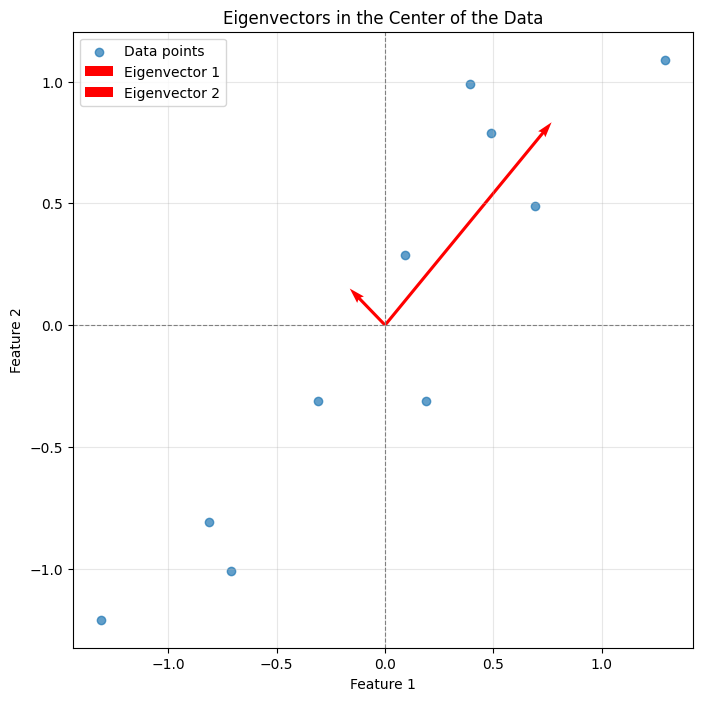

In [14]:
# Step 4: Scale eigenvectors by the square root of eigenvalues
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)

# Step 5: Plot the data and eigenvectors
plt.figure(figsize=(8, 8))
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, label="Data points")

# Plot eigenvectors
for i in range(len(eigenvalues)):
    plt.quiver(0, 0, scaled_eigenvectors[0, i], scaled_eigenvectors[1, i],
               angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label=f"Eigenvector {i+1}")

# Add labels and legend
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.title("Eigenvectors in the Center of the Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()